## House Classification Project

##### Importing the required libaries

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore")

Loading the Dataset

In [111]:
data = pd.read_csv('housing.csv')

data1 = data.copy()
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Statistical Summary of the Dataset

In [112]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Checking for null values in the Dataset

In [113]:
data.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0



Handling missing values in the dataset

In [114]:
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].median())

Verifying whether null values in the dataset are removed

In [115]:
data.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


#### Price Range Division

In [116]:
price_quantiles = data['median_house_value'].quantile([0.25, 0.5, 0.75]) ## Classifying target -> Least expensive, affordable, expensive, and luxurious

print(price_quantiles)

### Function to assign labels to houses
def classify_house(value):
    if value <= price_quantiles[0.25]:
        return 'Least Expensive'
    elif price_quantiles[0.25] < value <= price_quantiles[0.5]:
        return 'Affordable'
    elif price_quantiles[0.5] < value <= price_quantiles[0.75]:
        return 'Expensive'
    else:
        return 'Luxury'
data['house_category'] = data['median_house_value'].apply(classify_house) ## Adding new column for the categories
print(data['house_category'].value_counts())


0.25    119600.0
0.50    179700.0
0.75    264725.0
Name: median_house_value, dtype: float64
house_category
Least Expensive    5162
Affordable         5161
Luxury             5160
Expensive          5157
Name: count, dtype: int64


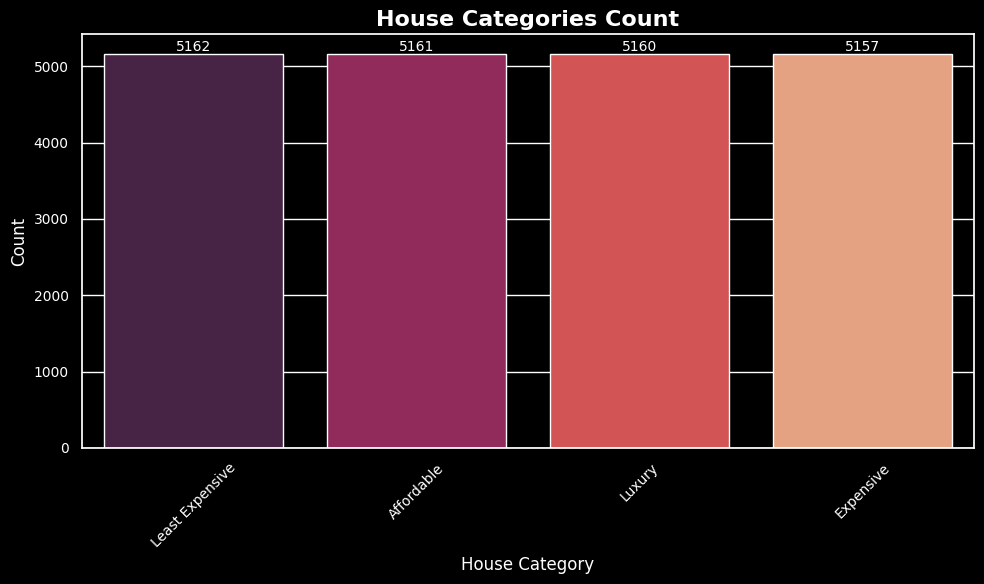

In [117]:
# Prepare the data for plotting
category_counts = data['house_category'].value_counts().reset_index()
category_counts.columns = ['house_category', 'count']

plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='house_category', y='count', data=category_counts, palette='rocket')
plt.title('House Categories Count', fontsize=16, fontweight='bold', color='white')
ax.set_ylabel('Count', fontsize=12, color='white')
ax.set_xlabel('House Category', fontsize=12, color='white')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='white',
                xytext=(0, 5), textcoords='offset points')

plt.xticks(fontsize=10, rotation=45, color='white')
plt.yticks(fontsize=10, color='white')
plt.tight_layout()
plt.show()


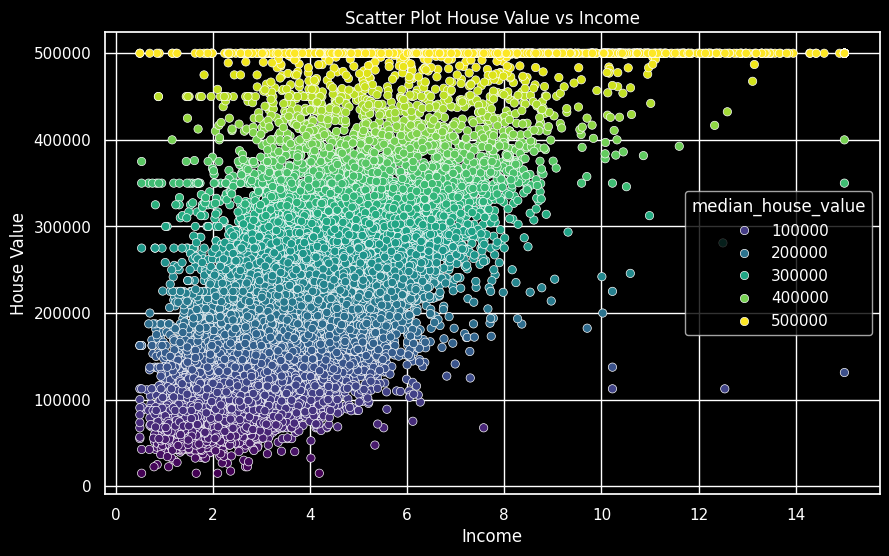

In [118]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
sns.scatterplot(y = data['median_house_value'], x = data['median_income'], data= data,hue = data['median_house_value'],palette='viridis')
plt.title('Scatter Plot House Value vs Income')
plt.xlabel('Income')
plt.ylabel('House Value')
plt.show()


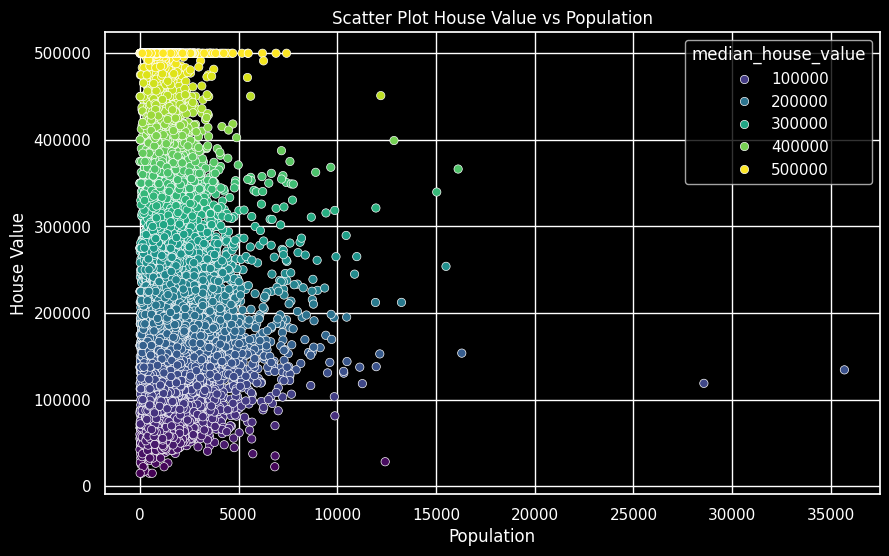

In [119]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
sns.scatterplot(y = data['median_house_value'], x = data['population'], data= data,hue = data['median_house_value'],palette='viridis')
plt.title('Scatter Plot House Value vs Population')
plt.xlabel('Population')
plt.ylabel('House Value')
plt.show()


In [120]:
data.ocean_proximity.value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [122]:
from sklearn.preprocessing import LabelEncoder
data1['ocean_proximity'] = LabelEncoder().fit_transform(data1['ocean_proximity'])
numeric_data = data1.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_data.corr()

In [121]:
data1.ocean_proximity.value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


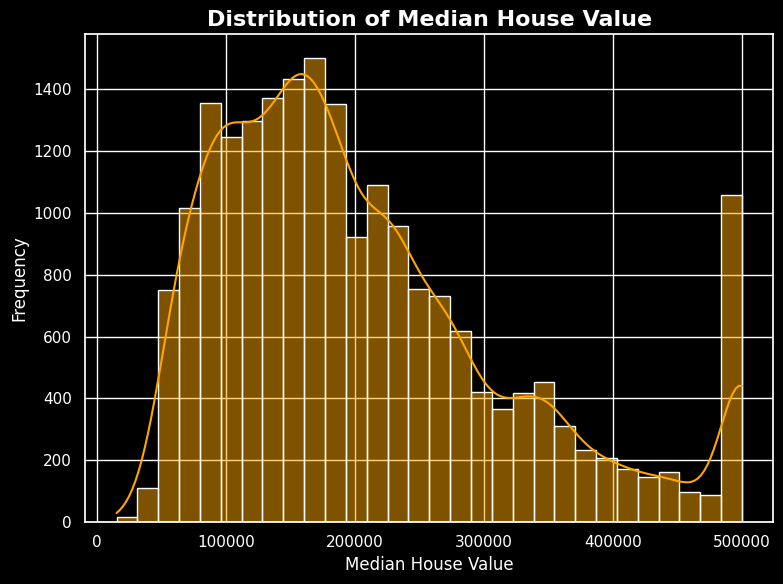

In [123]:
plt.figure(figsize=(8, 6))
sns.histplot(data['median_house_value'], kde=True, color="orange", bins=30)
plt.title("Distribution of Median House Value", fontsize=16, fontweight="bold", color="white")
plt.xlabel("Median House Value", fontsize=12, color="white")
plt.ylabel("Frequency", fontsize=12, color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.tight_layout()
plt.show()

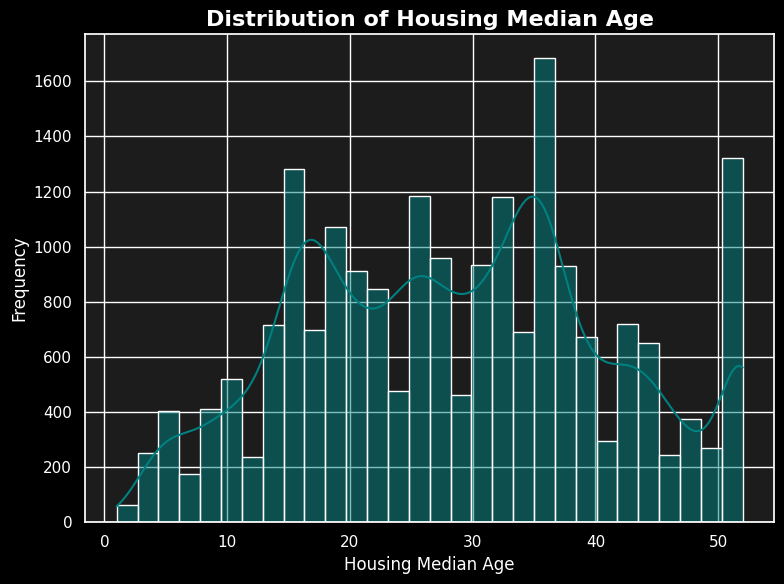

In [124]:
plt.figure(figsize=(8, 6))
sns.set_theme(style="darkgrid", rc={"axes.facecolor": "#1c1c1c", "figure.facecolor": "#1c1c1c"})
sns.histplot(data['housing_median_age'], kde=True, color="teal", bins=30)
plt.title("Distribution of Housing Median Age", fontsize=16, fontweight="bold", color="white")
plt.xlabel("Housing Median Age", fontsize=12, color="white")
plt.ylabel("Frequency", fontsize=12, color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.tight_layout()
plt.show()

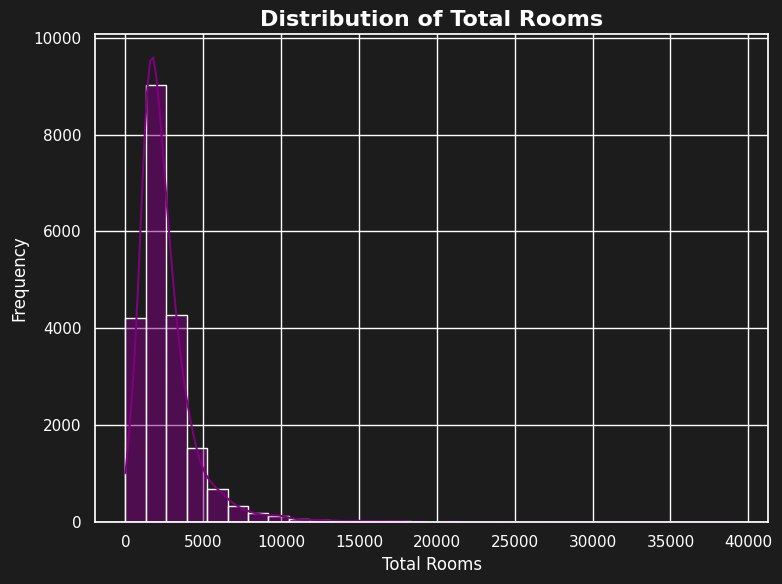

In [125]:

plt.figure(figsize=(8, 6))
sns.histplot(data['total_rooms'], kde=True, color="purple", bins=30)
plt.title("Distribution of Total Rooms", fontsize=16, fontweight="bold", color="white")
plt.xlabel("Total Rooms", fontsize=12, color="white")
plt.ylabel("Frequency", fontsize=12, color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.tight_layout()
plt.show()

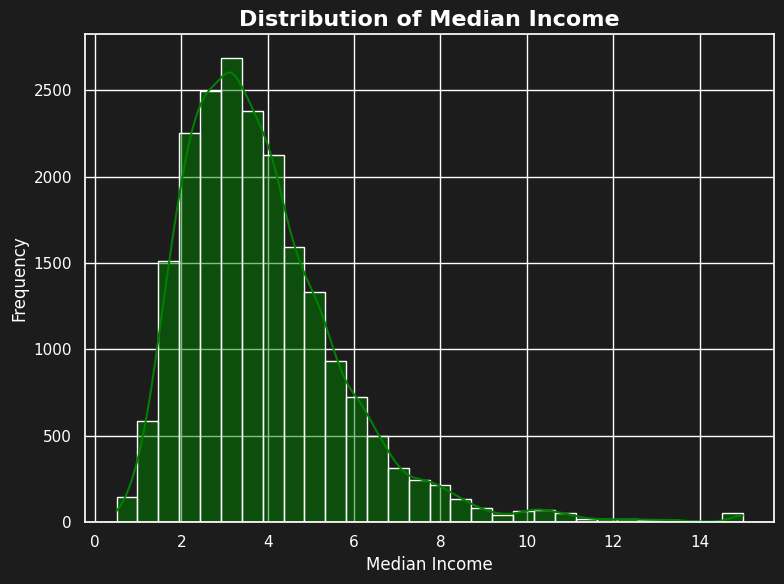

In [126]:
plt.figure(figsize=(8, 6))
sns.histplot(data['median_income'], kde=True, color="green", bins=30)
plt.title("Distribution of Median Income", fontsize=16, fontweight="bold", color="white")
plt.xlabel("Median Income", fontsize=12, color="white")
plt.ylabel("Frequency", fontsize=12, color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.tight_layout()
plt.show()

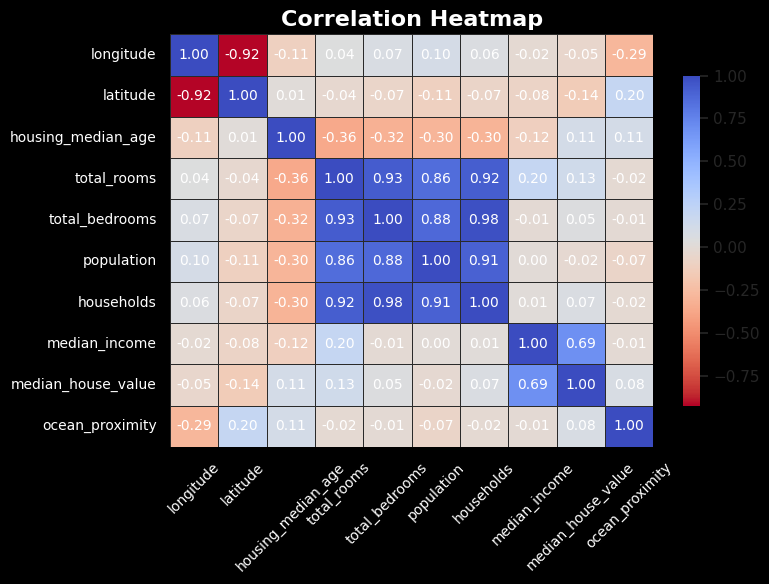

In [127]:
plt.style.use('dark_background')
plt.figure(figsize=(8, 6))
#sns.set_theme(style="white")
sns.set_theme(style="darkgrid", rc={"axes.facecolor": "#1c1c1c", "figure.facecolor": "#1c1c1c"})

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm_r",
    cbar=True,
    cbar_kws={"shrink": 0.8, "orientation": "vertical"},
    linewidths=0.5,
    linecolor="#2a2a2a",
    annot_kws={"fontsize": 10,"color":"white"}
)
plt.title("Correlation Heatmap", fontsize=16, fontweight="bold",color='white')
plt.yticks(fontsize=10, color="white")
plt.xticks(fontsize=10, rotation=45, color="white")
plt.tight_layout()
plt.show()

#### Feature Engineering

In [128]:
data['rooms_per_household'] = data['total_rooms'] / data['households'] ## BHK
data['population_per_household'] = data['population'] / data['households'] ## People per house (density)
data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms'] ## Bedroom to rooms ratio
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True) ## Encoding categorical data
data = data.drop(columns=['median_house_value']) ## We wont use this anymore

### Model Training

In [129]:
## Creating Features and Target variables
X = data.drop(columns=['house_category'])
y = data['house_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [130]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'population_per_household', 'bedrooms_per_room',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [131]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [132]:
## Dictionary of classifier models
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=42),
    "Decision Trees": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}
best_model = None
best_accuracy = 0
results = {}

for model_name, model in classifiers.items():
    model.fit(X_train, y_train_encoded)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test_encoded, y_pred)
    results[model_name] = {
        "accuracy": accuracy,
        "classification_report": classification_report(y_test_encoded, y_pred)
    }

    ## Saving the best performing model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model


for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print("Accuracy:", metrics["accuracy"])
    print("Classification Report:\n", metrics["classification_report"])


Model: Random Forest
Accuracy: 0.7437015503875969
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.66      0.67      1032
           1       0.64      0.69      0.66      1032
           2       0.84      0.84      0.84      1032
           3       0.83      0.79      0.81      1032

    accuracy                           0.74      4128
   macro avg       0.75      0.74      0.74      4128
weighted avg       0.75      0.74      0.74      4128


Model: Logistic Regression
Accuracy: 0.4256298449612403
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.25      0.31      1032
           1       0.34      0.23      0.27      1032
           2       0.40      0.48      0.44      1032
           3       0.49      0.74      0.59      1032

    accuracy                           0.43      4128
   macro avg       0.41      0.43      0.40      4128
weighted avg       0.41      

In [133]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train, y_train_encoded)

y_pred_gb = gb_classifier.predict(X_test)
accuracy_gb = accuracy_score(y_test_encoded, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)
print("Classification Report:\n", classification_report(y_test_encoded, y_pred_gb))


Gradient Boosting Accuracy: 0.7311046511627907
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.63      0.63      1032
           1       0.64      0.68      0.66      1032
           2       0.82      0.83      0.82      1032
           3       0.84      0.79      0.81      1032

    accuracy                           0.73      4128
   macro avg       0.73      0.73      0.73      4128
weighted avg       0.73      0.73      0.73      4128



In [134]:
accuracies = {}
for model_name, acc in results.items():
    accuracies[model_name] = acc["accuracy"]
accuracies['gradientboost'] = accuracy_gb
accuracies

{'Random Forest': 0.7437015503875969,
 'Logistic Regression': 0.4256298449612403,
 'K-Nearest Neighbors': 0.3701550387596899,
 'Support Vector Machine': 0.404796511627907,
 'Decision Trees': 0.6453488372093024,
 'XGBoost': 0.7659883720930233,
 'gradientboost': 0.7311046511627907}

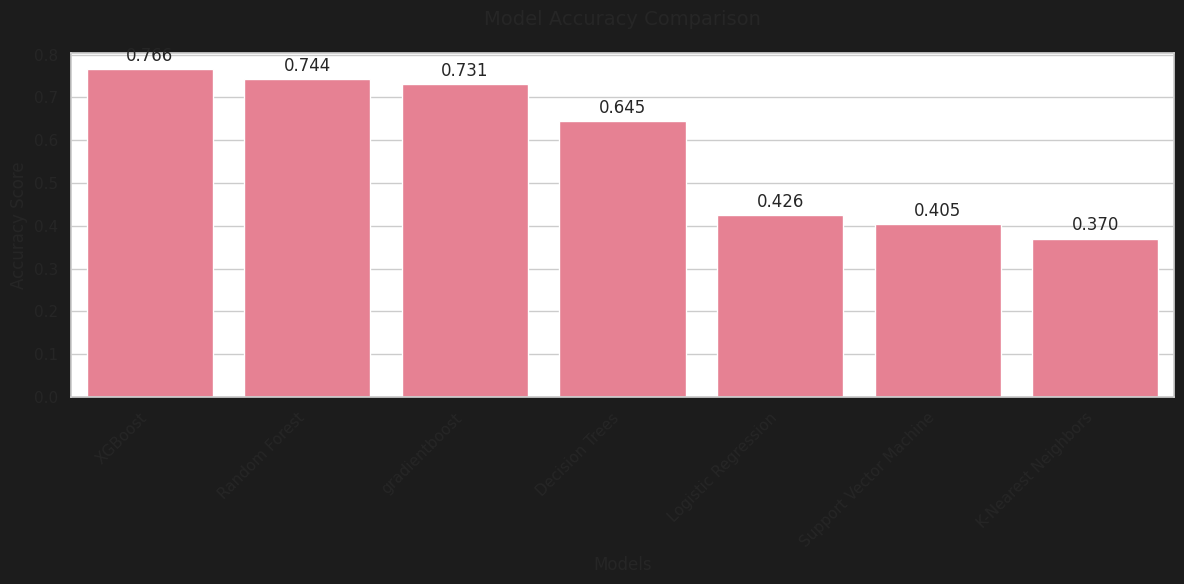

In [135]:
df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.set_palette("husl")

ax = sns.barplot(data=df.sort_values('Accuracy', ascending=False), x='Model', y='Accuracy')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.title('Model Accuracy Comparison', pad=20, fontsize=14)
plt.ylabel('Accuracy Score')
plt.xlabel('Models')
plt.tight_layout()

for i in ax.containers:
    ax.bar_label(i, fmt='%.3f', padding=3)

plt.show()

In [136]:
from joblib import dump, load

In [137]:
dump(best_model, 'best_classification_model.joblib')
print("\n Best model saved as 'best_classification_model.joblib'")


 Best model saved as 'best_classification_model.joblib'


### Getting the Feature Importance Ranking

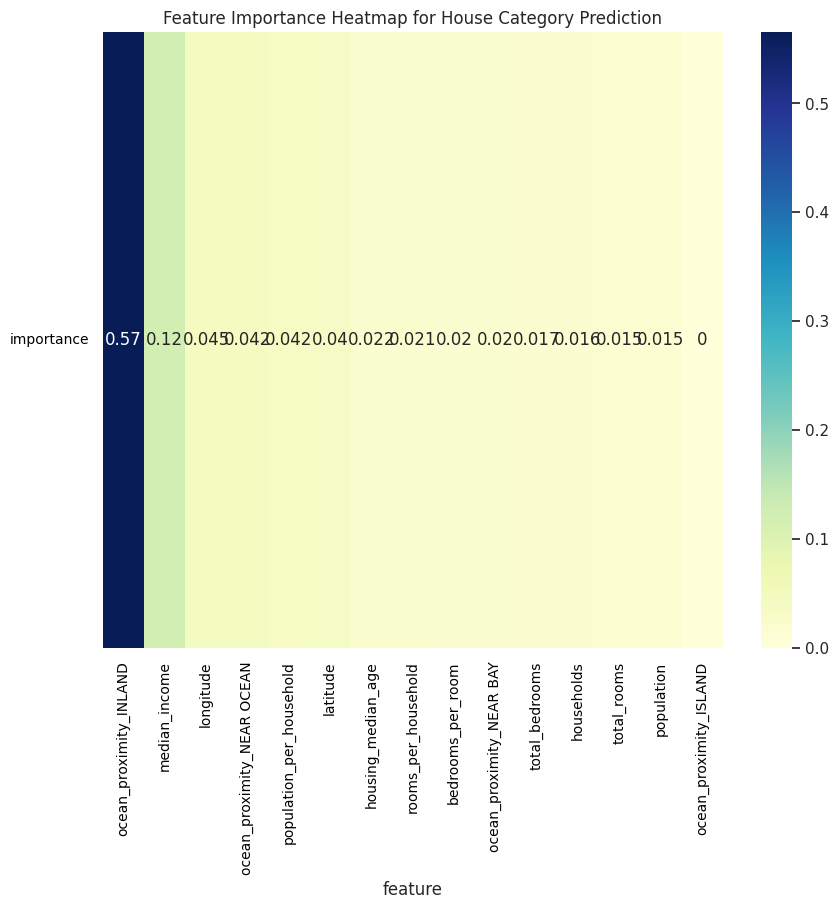

In [138]:
if hasattr(model, "feature_importances_"):
    ## Getting the feature importance values from the model
    feature_importances = model.feature_importances_
    feature_importances_df = pd.DataFrame({
        'feature': X.columns,
        'importance': feature_importances
    }).sort_values(by='importance', ascending=False)

    ## Plotting feature importance heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(feature_importances_df.set_index('feature').T, annot=True, cmap="YlGnBu", cbar=True)
    plt.xticks(fontsize=10, rotation=90, color="black")
    plt.yticks(fontsize=10,rotation=360, color="black")
    plt.title("Feature Importance Heatmap for House Category Prediction")
    plt.show()
else:
    print("The loaded model does not provide feature importances directly.")

In [139]:
## Load the saved model
model = load('best_classification_model.joblib')
## NEW DATA TO TEST THE MODEL
new_data = pd.DataFrame({
    'longitude': [-122.23],
    'latitude': [37.88],
    'housing_median_age': [41.0],
    'total_rooms': [880.0],
    'total_bedrooms': [129.0],
    'population': [322.0],
    'households': [126.0],
    'median_income': [8.3252],
    'rooms_per_household': [880.0 / 126.0],
    'population_per_household': [322.0 / 126.0],
    'bedrooms_per_room': [129.0 / 880.0],
    'ocean_proximity_INLAND': [1],
    'ocean_proximity_ISLAND': [0],
    'ocean_proximity_NEAR BAY': [0],
    'ocean_proximity_NEAR OCEAN': [0]

})

# Make predictions
predictions = model.predict(new_data)
predictions = le.inverse_transform(predictions)
print("Predicted house category:", predictions[0])


Predicted house category: Luxury


In [140]:
predictions

array(['Luxury'], dtype=object)